Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) that was introduced by Cho et al. in 2014 as a simpler alternative to Long Short-Term Memory (LSTM) networks. Like LSTM, GRU can process sequential data such as text, speech, and time-series data.

The basic idea behind GRU is to use gating mechanisms to selectively update the hidden state of the network at each time step. The gating mechanisms are used to control the flow of information in and out of the network. The GRU has two gating mechanisms, called the reset gate and the update gate.

The reset gate determines how much of the previous hidden state should be forgotten, while the update gate determines how much of the new input should be used to update the hidden state. The output of the GRU is calculated based on the updated hidden state.

The equations used to calculate the reset gate, update gate, and hidden state of a GRU are as follows:

Reset gate: r_t = sigmoid(W_r * [h_{t-1}, x_t])<br>
Update gate: z_t = sigmoid(W_z * [h_{t-1}, x_t])<br>
Candidate hidden state: h_t’ = tanh(W_h * [r_t * h_{t-1}, x_t])<br>
Hidden state: h_t = (1 – z_t) * h_{t-1} + z_t * h_t’<br>
where W_r, W_z, and W_h are learnable weight matrices, x_t is the input at time step t, h_{t-1} is the previous hidden state, and h_t is the current hidden state.

In summary, GRU networks are a type of RNN that use gating mechanisms to selectively update the hidden state at each time step, allowing them to effectively model sequential data. They have been shown to be effective in various natural language processing tasks, such as language modeling, machine translation, and speech recognition.

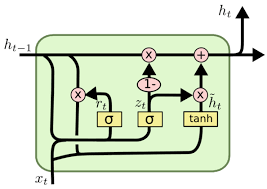

In [1]:
! pip install torch
! pip install torchvision

In [2]:
import torch

In [3]:
import torchvision
torchvision.__version__

'0.16.2'

In [19]:
from torchvision import datasets
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np

torch.manual_seed(125)

In [5]:
train_dataset=datasets.MNIST(root="./data",train=True,transform=transforms.ToTensor(),download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 70659765.23it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43715515.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 22199760.53it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11665969.85it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
test_dataset=datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor(),download=True)

In [7]:
batch_size=100
num_iters=6000
epochs=int(num_iters/(len(train_dataset)/batch_size))
epochs

10

In [8]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [9]:
for id,(data,target) in enumerate(train_loader):
    
    # Now each data batch has a shape of (batch_size, sequence_length, input_size)
    print("Shape of data and target batch:", data.shape,target.shape)
    break  # Only process the first batch for demonstration

Shape of data and target batch: torch.Size([100, 1, 28, 28]) torch.Size([100])


In [10]:
input_size=28
sequence_length =28
num_layers=2
hidden_size=256

learning_rate = 0.001
num_epochs = 10
dropout=0.02
num_classes =10
batch_size = 100
clip=1.0


In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
class GRU(nn.Module):
    def __init__(self,input_size=input_size,hidden_size=hidden_size,sequence_legth=sequence_length,num_layers=num_layers,dropout=dropout):
        super().__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.dropout=dropout
        
        self.rnn=nn.GRU(input_size,hidden_size,num_layers,dropout=dropout,batch_first=True)
        self.fc=nn.Linear(sequence_length*hidden_size,num_classes)
        
    def forward(self,x):
        # x-> [batch_size,seq_length,input_size] -> [100,28,28]
        h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
        # h0 ->[num_layers*bidirectional,batch_size,hidden_size] -> [num_layers,100,hidden_size]
        out,_=self.rnn(x,h0)
        out=out.reshape(out.shape[0],-1) #shape -> [batch_size,seq_length*hidden_size] -> [100,28*256]
        out=self.fc(out)
        return out#shape->[100,10]

In [13]:
model = GRU().to(device=device)
model.parameters()

<generator object Module.parameters at 0x78afdb0b05f0>

In [14]:
x=torch.randn(100,28,28).to(device=device)
y=model(x)
y

tensor([[ 1.0170e-02, -3.7076e-02,  4.9998e-02, -1.5098e-02,  2.0451e-02,
         -1.1983e-02,  3.1438e-02, -2.7773e-02, -4.2119e-02, -1.2367e-02],
        [ 4.9107e-02,  8.2337e-03,  3.2977e-02, -2.9994e-02,  2.2879e-02,
         -1.3254e-02,  1.3681e-02, -5.1235e-02, -3.7867e-03, -4.2649e-02],
        [ 9.1723e-03, -8.3878e-03,  5.5333e-02, -2.0912e-02, -3.5929e-02,
         -7.0706e-03,  2.7963e-02,  8.9293e-03, -4.0749e-02, -1.2113e-02],
        [ 1.4117e-02, -4.4824e-04,  1.1541e-02, -6.2711e-03,  1.9567e-02,
         -4.5270e-02,  1.5749e-02, -2.0297e-02, -4.4251e-02, -2.5421e-03],
        [-1.1209e-02, -2.9486e-02,  2.4800e-02,  3.7433e-02,  2.7173e-02,
         -1.6323e-03,  2.0524e-02, -1.1270e-02, -1.1628e-02,  3.7471e-02],
        [ 1.4786e-02, -1.1338e-02,  1.5906e-02,  9.7140e-03, -8.2592e-03,
         -3.6270e-02, -6.3548e-03, -2.9235e-02,  1.2496e-04, -7.3851e-04],
        [-3.3551e-02,  2.9447e-02,  4.5847e-02,  3.4029e-02,  6.1603e-02,
         -5.1603e-02,  4.2235e-0

In [15]:
import torch.optim as optim

loss=nn.CrossEntropyLoss()
optimizer=optim.Adam(params=model.parameters(),lr=learning_rate)

In [16]:
def training_fn(data_loader):#train_dataloader
    epoch_loss=0
    
    for data,target in data_loader:
        data=data.to(device)
        target=target.to(device)
        
        data=data.squeeze(1)
        cal=model(data)
        curr_loss=loss(cal,target)
        curr_loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(),clip)
        optimizer.step()
        epoch_loss+=curr_loss
    return epoch_loss/len(data)

In [17]:
import tqdm

In [20]:

for epoch in  tqdm.tqdm(range(num_epochs)):
    train_loss=training_fn(train_loader)
    print(f"At epoch: {epoch}, loss: {train_loss}")

100%|██████████| 10/10 [01:31<00:00,  9.14s/it]


In [22]:
train_loss

tensor(0.3204, device='cuda:0', grad_fn=<DivBackward0>)

In [50]:
def evaluation(loader,model):
    
    total_correct=0
    total_samples=0
    model.eval()
    with torch.no_grad():
        for data,target in loader:
            x=data.to(device=device)
            y=target.to(device=device)
            
            x=x.squeeze(1)
            predictions=model(x)
            _,prediction_s=predictions.max(1)
            total_correct+=(y==prediction_s).sum()
            total_samples+=prediction_s.size(0)
        print("Total Samples: {}, Total Correct Predictions: {}, Accuracy: {}".format(total_samples,total_correct,(total_correct/total_samples)*100))
        return prediction_s,y

In [51]:
evaluation(test_loader,model)


Total Samples: 10000, Total Correct Predictions: 9870, Accuracy: 98.69999694824219


(tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
         9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4,
         0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
         4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
         3, 4, 5, 6], device='cuda:0'),
 tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
         9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4,
         0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
         4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
         3, 4, 5, 6], device='cuda:0'))